Task 1 – Develop a Central Prediction Problem

## 🧩 Task 1 – Develop a Central Prediction Problem

**Goal:** Predict the **ride cost charged to passengers** using only the variables provided in the dataset.

- **Target (y):** `Historical_Cost_of_Ride`
- **Features (X):** `Number_of_Riders`, `Number_of_Drivers`, `Location_Category`, `Customer_Loyalty_Status`, `Number_of_Past_Rides`, `Average_Ratings`, `Time_of_Booking`, `Vehicle_Type`, `Expected_Ride_Duration`.

**Scope rule:** No external data (fuel, traffic, weather). Only use the given columns.


Code Cell 1 — Imports & Config (no EDA here)

In [2]:
# Task 1: Setup (no EDA here)
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

# Reproducibility seed (for later splitting/modeling)
RANDOM_STATE = 42


Code Cell 2 — Load Dataset

In [3]:
# Task 1: Load dataset
DATA_PATH = "dynamic_pricing.csv"  # keep the csv in the same folder as this notebook

df = pd.read_csv(DATA_PATH)
print("Loaded dataset with shape:", df.shape)
df.head(3)  # quick peek only; no plotting/EDA here


Loaded dataset with shape: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469


Code Cell 3 — Define Target & Feature Set

In [4]:
# Task 1: Define target and features (strictly columns in the dataset)
TARGET = "Historical_Cost_of_Ride"

FEATURES = [
    "Number_of_Riders",
    "Number_of_Drivers",
    "Location_Category",
    "Customer_Loyalty_Status",
    "Number_of_Past_Rides",
    "Average_Ratings",
    "Time_of_Booking",
    "Vehicle_Type",
    "Expected_Ride_Duration",
]

# Sanity checks (ensures columns exist; raises a clear error if not)
missing = [c for c in [TARGET] + FEATURES if c not in df.columns]
assert not missing, f"Missing expected columns: {missing}"

X = df[FEATURES].copy()
y = df[TARGET].copy()

print(f"X shape: {X.shape} | y shape: {y.shape}")
print("Target:", TARGET)
print("First 3 feature rows:")
X.head(3)


X shape: (1000, 9) | y shape: (1000,)
Target: Historical_Cost_of_Ride
First 3 feature rows:


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
0,90,45,Urban,Silver,13,4.47,Night,Premium,90
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76


Code Cell 4 — Problem “Config” (optional, nice for documentation)

In [5]:
# Task 1: Problem configuration object (useful for later reference/logging)
problem_config = {
    "goal": "Predict passenger ride cost (fare) from given internal features only.",
    "target": TARGET,
    "features": FEATURES,
    "dataset_path": DATA_PATH,
    "external_data_used": False,
    "random_state": RANDOM_STATE,
}

problem_config


{'goal': 'Predict passenger ride cost (fare) from given internal features only.',
 'target': 'Historical_Cost_of_Ride',
 'features': ['Number_of_Riders',
  'Number_of_Drivers',
  'Location_Category',
  'Customer_Loyalty_Status',
  'Number_of_Past_Rides',
  'Average_Ratings',
  'Time_of_Booking',
  'Vehicle_Type',
  'Expected_Ride_Duration'],
 'dataset_path': 'dynamic_pricing.csv',
 'external_data_used': False,
 'random_state': 42}

Task 2 – Formulate Clear Objectives

Step 2.1 — Restate the problem (1–2 lines)

### 2.1 Problem Restatement

The purpose of this project is to **predict the expected ride cost charged to passengers** in a ride-sharing platform using only the information available in the dataset.

The target variable is:
- **`Historical_Cost_of_Ride`** – the price charged for a ride.

We will analyze how various features (e.g., ride duration, number of drivers, time of booking, vehicle type, and customer loyalty) influence the final ride cost and build predictive models to estimate this value.



Step 2.2 — Primary & secondary objectives

### 2.2 Objectives

**Primary Objective**
- To predict the ride cost (`Historical_Cost_of_Ride`) using only the provided dataset features.

**Secondary Objectives**
1. To identify the most influential predictors of ride cost using **Best Subset Selection**.
2. To clean, prepare, and analyze the data prior to modeling.
3. To apply multiple regression-based models and compare their performance.
4. To evaluate model accuracy using appropriate statistical metrics and cross-validation.


Step 2.3 — Evaluation Metrics


### 2.3 Evaluation Metrics

The performance of the prediction models will be evaluated using:

- **R² (Coefficient of Determination):** Indicates how much of the variation in ride cost is explained by the model.
- **RMSE (Root Mean Squared Error):** Measures average prediction error magnitude.
- **MAE (Mean Absolute Error):** Captures the average absolute difference between actual and predicted values.

The model with the **highest cross-validated R²** and **lowest RMSE/MAE** will be selected as the final model.


Step 2.4 — Modeling Plan

### 2.4 Modeling Plan

The project will follow these steps:

1. **Data Preparation**
   - Handle missing and duplicate values.
   - Split the dataset into **training (80%)** and **testing (20%)** sets.
   - Conduct EDA **only on the training dataset** to avoid data leakage.

2. **Feature Selection**
   - Apply **Best Subset Selection** to identify the most statistically significant combination of predictors.
   - Select the subset of features with the **highest Adjusted R²** and **lowest AIC** for model development.

3. **Model Development**
   - Train and compare regression models:
     - Linear Regression (baseline)
     - Decision Tree Regression (nonlinear model)
     - Random Forest Regression (ensemble model)
   - Validate models using **5-fold Cross-Validation** and fine-tune parameters for improved accuracy.

4. **Model Evaluation**
   - Evaluate models on the unseen **test dataset** using RMSE, MAE, and R² metrics.
   - Select the final model based on cross-validation and test performance.


Step 2.5 — Data Handling Policy

### 2.5 Data Handling Policy

To maintain model integrity and avoid data leakage:

- Perform all **EDA and preprocessing on the training dataset only**.
- Keep the **test dataset unseen** until final evaluation.
- Fit all encoders, scalers, and feature selectors **only on the training data**.
- Apply trained transformations to the test data during evaluation.


Step 2.6 — Project Constraints & Limitations

### 2.6 Project Constraints & Limitations

- The analysis is limited to the variables provided in the dataset (e.g., no fuel prices, weather, or traffic data).  
- The model’s accuracy depends entirely on the quality and representativeness of the available data.  
- The results are specific to the dataset and may not generalize to other ride-sharing scenarios.


Step 2.7 — Deliverables of Task 2

### 2.7 Deliverables for Task 2

- A clearly defined prediction problem and objectives.
- A documented modeling plan including Best Subset Selection.
- Established evaluation metrics and success criteria.
- Defined data handling policy ensuring no leakage between train/test data.


In [15]:
TASK_2 = {
    "primary_objective": "Predict ride cost (Historical_Cost_of_Ride) using dataset features.",
    "feature_selection_method": "Best Subset Selection",
    "evaluation_metrics": ["R2", "RMSE", "MAE"],
    "validation_strategy": "5-Fold Cross-Validation",
    "model_plan": [
        "LinearRegression (baseline)",
        "DecisionTreeRegressor",
        "RandomForestRegressor"
    ],
    "data_policy": {
        "EDA_on_train_only": True,
        "Fit_on_train_only": True,
        "Test_for_final_eval_only": True
    },
    "external_data_used": False
}
TASK_2


{'primary_objective': 'Predict ride cost (Historical_Cost_of_Ride) using dataset features.',
 'feature_selection_method': 'Best Subset Selection',
 'evaluation_metrics': ['R2', 'RMSE', 'MAE'],
 'validation_strategy': '5-Fold Cross-Validation',
 'model_plan': ['LinearRegression (baseline)',
  'DecisionTreeRegressor',
  'RandomForestRegressor'],
 'data_policy': {'EDA_on_train_only': True,
  'Fit_on_train_only': True,
  'Test_for_final_eval_only': True},
 'external_data_used': False}

Task 3 – Data Cleaning and Exploratory Data Analysis (EDA)

Step 3.1 – Load Libraries and Dataset

In [7]:
# Task 3: Libraries & Data Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape of dataset: (1000, 10)


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


Step 3.2 – Basic Data Inspection (Full Dataset)

(Quick overview only before splitting — not full EDA.)

In [8]:
# Check column info and types
df.info()

# Summary statistics
df.describe(include='all').T

# Check for missing values and duplicates
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB

Missing values per column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_R

Step 3.3 – Split Data into Train and Test Sets

In [9]:
# Define target variable
target = "Historical_Cost_of_Ride"
X = df.drop(columns=[target])
y = df[target]

# Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Combine for easy EDA
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

print("Training shape:", train_df.shape)
print("Testing shape:", test_df.shape)


Training shape: (800, 10)
Testing shape: (200, 10)


Step 3.4 – Data Cleaning (Training Data Only)

In [10]:
# Info check on training data
train_df.info()

# Check missing values in training data
train_df.isnull().sum()

# Check duplicates in training data
print("Duplicate rows in training data:", train_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         800 non-null    int64  
 1   Number_of_Drivers        800 non-null    int64  
 2   Location_Category        800 non-null    object 
 3   Customer_Loyalty_Status  800 non-null    object 
 4   Number_of_Past_Rides     800 non-null    int64  
 5   Average_Ratings          800 non-null    float64
 6   Time_of_Booking          800 non-null    object 
 7   Vehicle_Type             800 non-null    object 
 8   Expected_Ride_Duration   800 non-null    int64  
 9   Historical_Cost_of_Ride  800 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 62.6+ KB
Duplicate rows in training data: 0


Step 3.5 – Descriptive Statistics (Train Data)

In [11]:
# Descriptive stats for numerical columns
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Number_of_Riders,800.0,60.766250,23.402269,20.000000,41.000000,61.000000,81.00000,100.00000
Number_of_Drivers,800.0,27.181250,19.043877,5.000000,11.000000,22.000000,38.00000,89.00000
Number_of_Past_Rides,800.0,51.151250,28.957020,0.000000,26.000000,53.000000,75.00000,100.00000
Average_Ratings,800.0,4.250463,0.430162,3.500000,3.880000,4.265000,4.60000,5.00000
Expected_Ride_Duration,800.0,98.850000,48.802891,10.000000,60.000000,100.000000,141.00000,180.00000
Historical_Cost_of_Ride,800.0,370.729560,186.156151,25.993449,223.281404,359.427089,505.64053,829.53438


Step 3.6 – Identify Column Types

In [12]:
# Identify categorical and numerical columns
cat_cols = train_df.select_dtypes(include="object").columns.tolist()
num_cols = train_df.select_dtypes(exclude="object").columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
Numerical Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']


Step 3.7 – Univariate Analysis (Individual Variable Distributions)

Numeric Columns

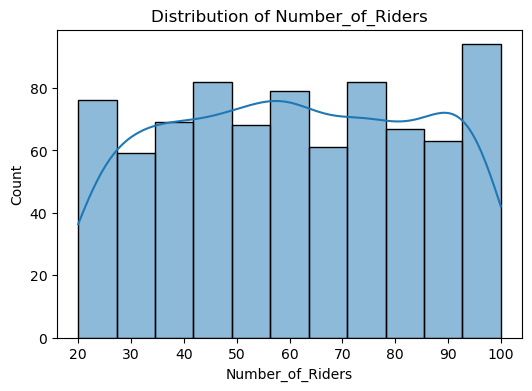

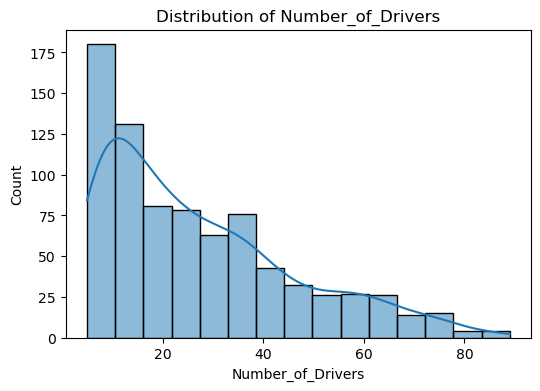

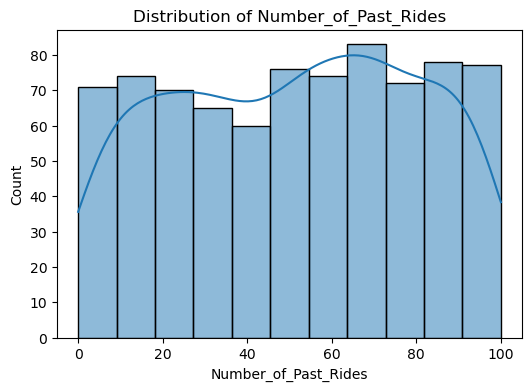

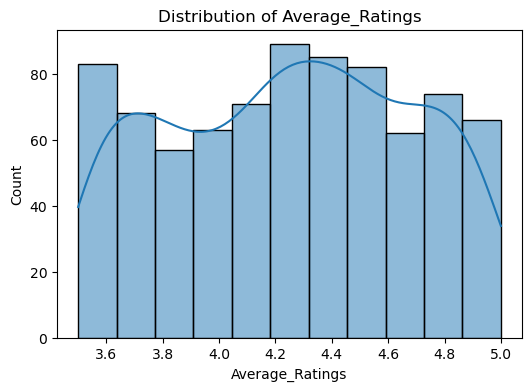

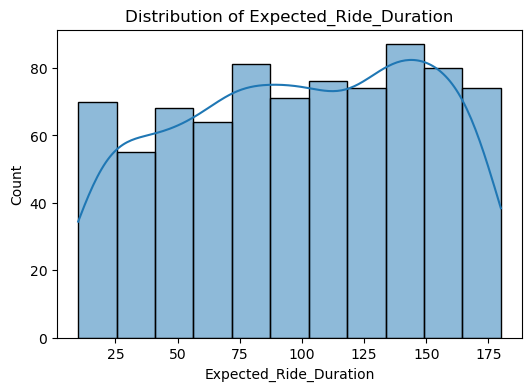

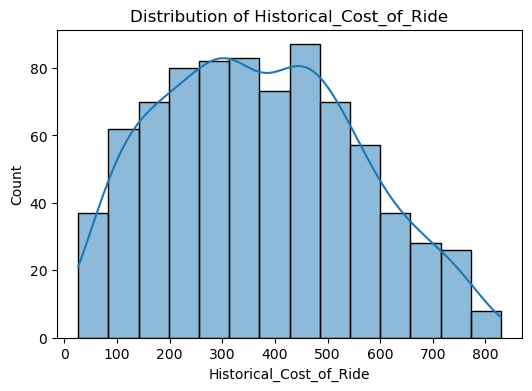

In [13]:
# Distribution plots for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Categorical Columns

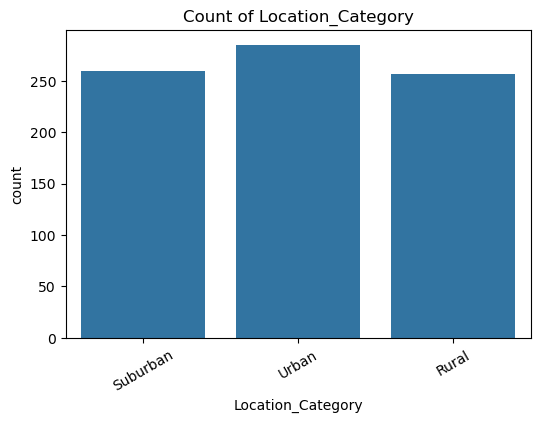

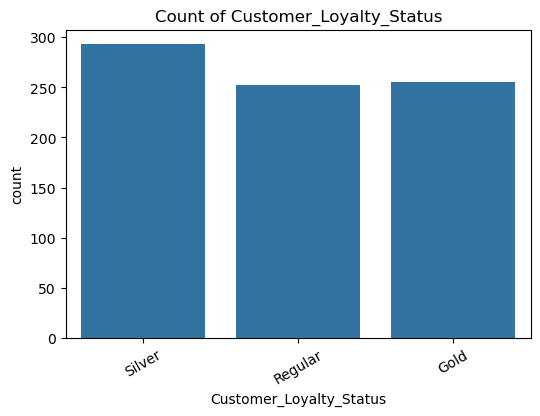

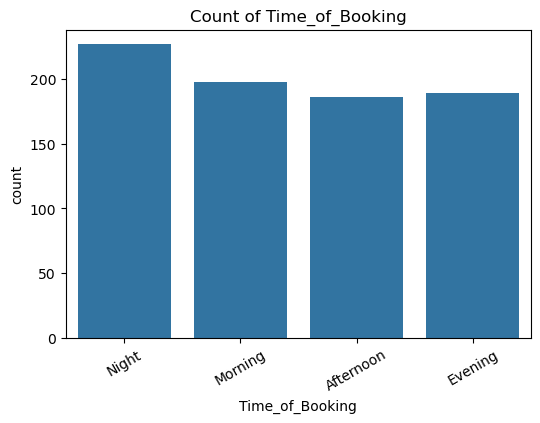

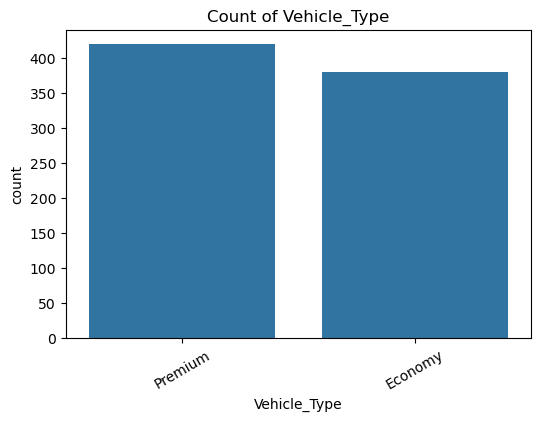

In [14]:
# Count plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=30)
    plt.show()


Step 3.8 – Bivariate Analysis (Feature Relationships)